# Section 4.4 — Regression with categorical predictors

This notebook contains the code examples from [Section 4.4 Regression with categorical predictors]() from the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
# RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/lm/categorical"

<Figure size 640x480 with 0 Axes>

In [3]:
# set random seed for repeatability
np.random.seed(42)
#######################################################

In [4]:
import statsmodels.formula.api as smf
from patsy import dmatrix

In [5]:

doctors = pd.read_csv("../datasets/doctors.csv")

## Example 1: binary predictor variable

In [6]:
lm3 = smf.ols("score ~ C(loc)", data=doctors).fit()
lm3.params

Intercept        52.956522
C(loc)[T.urb]    -6.992885
dtype: float64

In [7]:
dmatrix("C(loc)", doctors)[0:5]

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.]])

## Dummy coding for categorical predictors

In [8]:
groups = ["A", "B", "A", "C", "C", "B"]
df = pd.DataFrame({"group":groups})
df

,group
0,A
1,B
2,A
3,C
4,C
5,B


In [9]:
dmatrix("C(group)", df)

DesignMatrix with shape (6, 3)
  Intercept  C(group)[T.B]  C(group)[T.C]
          1              0              0
          1              1              0
          1              0              0
          1              0              1
          1              0              1
          1              1              0
  Terms:
    'Intercept' (column 0)
    'C(group)' (columns 1:3)

## Example 2: predictors with three levels

In [10]:
lm4 = smf.ols("score ~ C(work)", data=doctors).fit()
lm4.params

Intercept         46.545455
C(work)[T.eld]     4.569930
C(work)[T.hos]     2.668831
dtype: float64

In [11]:
lm4.rsquared, lm4.fvalue, lm4.f_pvalue

(0.007721762574919189, 0.5953116925291042, 0.5526627461285702)

In [12]:
doctors["work"].head(7)

0    hos
1    cli
2    hos
3    eld
4    cli
5    cli
6    hos
Name: work, dtype: object

In [13]:
dmatrix("C(work)", doctors)

DesignMatrix with shape (156, 3)
  Intercept  C(work)[T.eld]  C(work)[T.hos]
          1               0               1
          1               0               0
          1               0               1
          1               1               0
          1               0               0
          1               0               0
          1               0               1
          1               0               0
          1               0               0
          1               0               1
          1               0               0
          1               0               0
          1               1               0
          1               0               1
          1               0               0
          1               0               0
          1               0               0
          1               0               0
          1               0               1
          1               0               0
          1               1               0

## Example 3: mix of numerical and categorical predictors

In [14]:
lm5 = smf.ols("score ~ C(loc) + C(work) + alc + weed + exrc", data=doctors).fit()
lm5.params

Intercept         62.933582
C(loc)[T.urb]     -5.399745
C(work)[T.eld]     2.956527
C(work)[T.hos]     1.456601
alc               -1.776628
weed              -0.863727
exrc               1.780325
dtype: float64

In [15]:
lm5.summary()
lm5.diagn

{'jb': 2.3215538201646178,
 'jbpv': 0.3132427248919656,
 'skew': 0.23209278641160938,
 'kurtosis': 3.3764224756333663,
 'omni': 2.7903807171543233,
 'omnipv': 0.24778586371305433,
 'condno': 50.507630925076725,
 'mineigval': 15.37535445319753}

## Everything is a linear model

### One-sample t-test as a linear model

In [16]:
from scipy.stats import ttest_1samp

kombucha = pd.read_csv("../datasets/kombucha.csv")
ksample04 = kombucha[kombucha["batch"]==4]["volume"]

ttest_1samp(ksample04, popmean=1000)

TtestResult(statistic=3.087703149420272, pvalue=0.0037056653503329618, df=39)

In [17]:
# Prepare zero-centered data (volume - 1000)
kdat04 = pd.DataFrame()
kdat04["zcvolume"] = ksample04 - 1000

# linear model with only an intercept
lmk = smf.ols("zcvolume ~ 1", data=kdat04).fit()
lmk.tvalues[0], lmk.pvalues[0], lmk.df_resid
#######################################################

(3.0877031494203044, 0.003705665350332633, 39.0)

### Two-sample t-test as a linear model

#### East vs. West electricity prices

In [18]:
from scipy.stats import ttest_ind

eprices = pd.read_csv("../datasets/eprices.csv")
pricesW = eprices[eprices["loc"]=="West"]["price"]
pricesE = eprices[eprices["loc"]=="East"]["price"]
tstat, pval = ttest_ind(pricesW,pricesE,equal_var=True)
tstat, pval

(5.022875513276465, 0.00012497067987678488)

In [19]:
lme = smf.ols("price ~ C(loc)", data=eprices).fit()
lme.tvalues[1], lme.pvalues[1]

(5.02287551327646, 0.00012497067987678602)

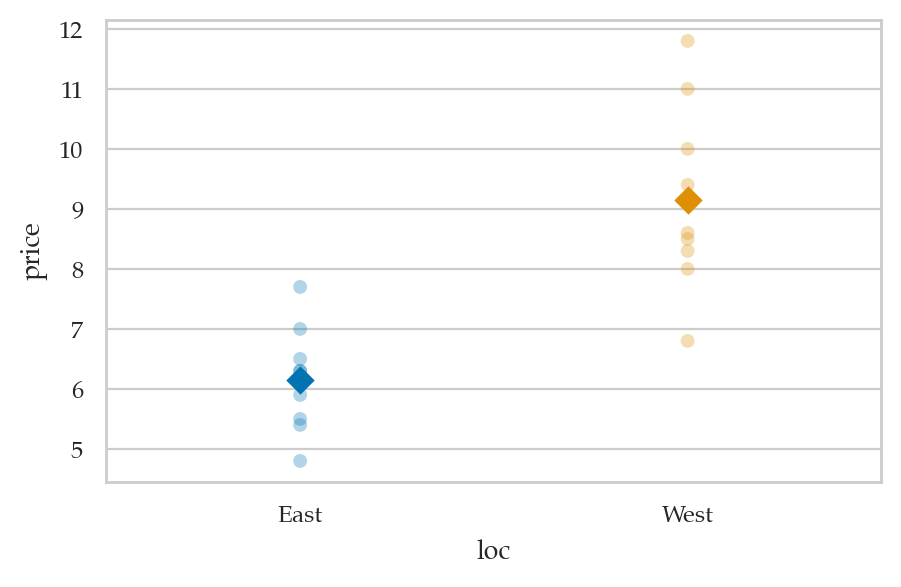

In [37]:
with plt.rc_context({"figure.figsize":(5,3)}):
    sns.stripplot(data=eprices, x="loc", y="price", hue="loc", jitter=0, alpha=0.3)
    sns.pointplot(data=eprices, x="loc", y="price", hue="loc", estimator="mean",
                  errorbar=None, marker="D")

#### Urban vs. Rural doctors

In [24]:
from scipy.stats import ttest_ind

scoresR = doctors[doctors["loc"]=="rur"]["score"]
scoresU = doctors[doctors["loc"]=="urb"]["score"]

tstat, pval = ttest_ind(scoresU, scoresR, equal_var=True)
tstat, pval

(-1.9657612140164198, 0.05112460353979369)

In [21]:
lm3 = smf.ols("score ~ C(loc)", data=doctors).fit()
lm3.tvalues[1], lm3.pvalues[1]

(-1.9657612140164218, 0.051124603539793465)

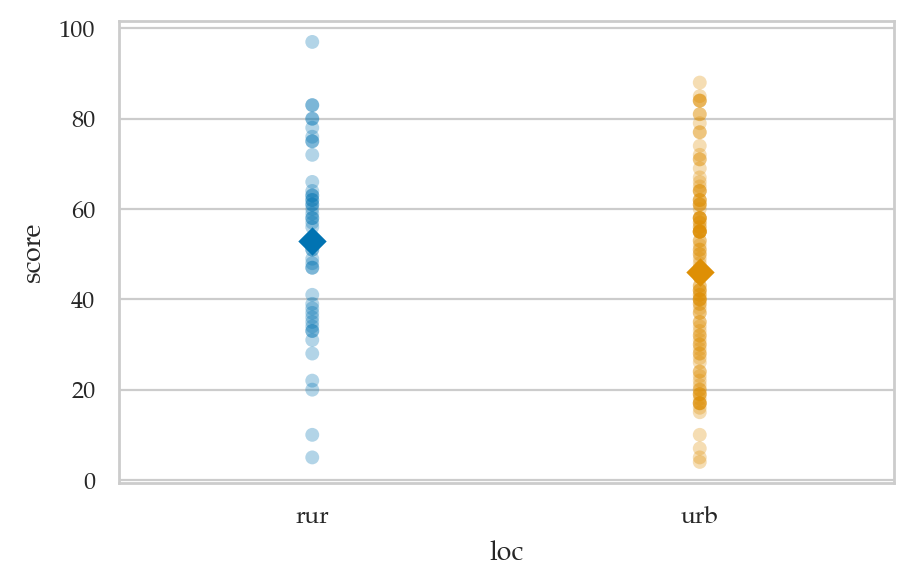

In [35]:
with plt.rc_context({"figure.figsize":(5,3)}):
    sns.stripplot(data=doctors, x="loc", y="score", hue="loc", jitter=0, alpha=0.3)
    sns.pointplot(data=doctors, x="loc", y="score", hue="loc", estimator="mean",
                  errorbar=None, marker="D")

### One-way ANOVA as a linear model

In [22]:
from scipy.stats import f_oneway

scoresH = doctors[doctors["work"]=="hos"]["score"]
scoresC = doctors[doctors["work"]=="cli"]["score"]
scoresE = doctors[doctors["work"]=="eld"]["score"]

f_oneway(scoresH, scoresC, scoresE)

F_onewayResult(statistic=0.5953116925291182, pvalue=0.5526627461285608)

In [23]:
lm4 = smf.ols("score ~ C(work)", data=doctors).fit()
lm4.fvalue, lm4.f_pvalue

(0.5953116925291042, 0.5526627461285702)

## Explanations

## Discussion

## Exercises

## Links